In [24]:
import numpy as np
import math

наша функція

In [25]:
PI = math.pi
step = 9

In [26]:
def target_function(x):
    return x * (PI**2 - x**2)

функція підрахунку інтегралу

In [27]:
def simpson_integral(func, left, right, num):
    h = (right - left) / num
    res = 0
    for i in range(num):
        l, r = left + i * h, left + (i + 1) * h
        res += func(l) + 4 * func((l + r) / 2) + func(r)
    return h / 6.0 * res

рахуємо коефіціенти фурє

In [28]:
bias = simpson_integral(lambda x: target_function(x) / (2.0 * PI), -PI, PI, 100)
sins = [simpson_integral(lambda x: target_function(x) / PI * np.sin(i * x), -PI, PI, 100) for i in range(1, step + 1)]
coss = [simpson_integral(lambda x: target_function(x) / PI * np.cos(i * x), -PI, PI, 100) for i in range(1, step + 1)]

функція яка по коефіціентах фурє рахує наближення функції

In [29]:
def trigonometric_polynom(x):
    res = bias
    for i in range(step):
        res += sins[i] * np.sin((i + 1) * x)
    for i in range(step):
        res += coss[i] * np.sin((i + 1) * x)
    return res

In [30]:
import matplotlib.pyplot as plt

In [31]:
def print_func(func):
    X = np.linspace(-PI, PI, 100)
    plt.plot(X, [func(i) for i in X])

Дивлюсь наскільки похожі функції

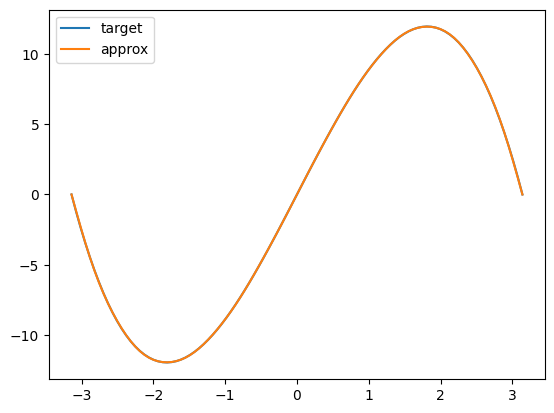

In [32]:
print_func(target_function), print_func(trigonometric_polynom)
plt.legend(["target", "approx"])

ряд фурє

In [33]:
print(f"{bias}")
for i in range(step):
    print(f" + {sins[i]} * sin({i+1}x)" + f" + {coss[i]} * cos({i+1}x)")

-4.510976590757831e-16
 + 12.0000001948945 * sin(1x) + -1.557914595777189e-16 * cos(1x)
 + -1.5000003902472991 * sin(2x) + -7.440786129085082e-16 * cos(2x)
 + 0.4444450309631521 * sin(3x) + -7.905835262152899e-16 * cos(3x)
 + -0.18750078417302607 * sin(4x) + 6.510687862949446e-16 * cos(4x)
 + 0.09600098368061717 * sin(5x) + 1.1161179193627623e-16 * cos(5x)
 + -0.055556741075533544 * sin(6x) + -1.5346621391237982e-15 * cos(6x)
 + 0.034986812920410004 * sin(7x) + -8.556904048447844e-16 * cos(7x)
 + -0.023439098161622207 * sin(8x) + 1.1347198846854749e-15 * cos(8x)
 + 0.016462715331077113 * sin(9x) + -4.696996243984958e-16 * cos(9x)
